In [ ]:
!pip install -U finance-datareader  # 주식시장
!pip install pandas-datareader      # 미국시장
!pip install --upgrade mplfinance   # 분석패키지

In [ ]:
!pip install mpl-finance

In [ ]:
# 문제) AAPL, MSFT, AMZN의 주식 데이터를
# 2010-01-01, 2016-12-31 까지 다운로드 한 다음 종가만 수집
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas_datareader as pdr
import matplotlib.ticker as ticker
import mpl_finance as matfin
from datetime import datetime
import datetime

import FinanceDataReader as fdr
import pandas as pd
import numpy as np

df_krx=fdr.StockListing('NASDAQ')
df_krx.head()

AAPL=fdr.DataReader('AAPL','2010-01-01','2016-12-31')
AAPL.head()
MSFT=fdr.DataReader('MSFT','2010-01-01','2016-12-31')
MSFT.head()
AMZN=fdr.DataReader('AMZN','2010-01-01','2016-12-31')
AMZN

AAPL['Close']
MSFT['Close']
AMZN['Close']
# 결측치 처리 dropna()

# 20일 60일 이동평균선을 구하고 시각화
    # rolling(window=20)



In [28]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1762 non-null   float64
 1   High    1762 non-null   float64
 2   Low     1762 non-null   float64
 3   Close   1762 non-null   float64
 4   Volume  1762 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 82.6 KB


In [34]:
AAPL.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,7.622500,7.660714,7.585000,6.478997,493729600
2010-01-05,7.664286,7.699643,7.616071,6.490199,601904800
2010-01-06,7.656429,7.686786,7.526786,6.386964,552160000
2010-01-07,7.562500,7.571429,7.466071,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,6.417542,447610800


In [43]:
AAPL_Close=AAPL['Close']
MSFT_Close=MSFT['Close']
AMZN_Close=AMZN['Close']

In [42]:
AAPL_Close.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
1762 non-null   float64
dtypes: float64(1)
memory usage: 27.5 KB


In [49]:
################### 3회사의 종가 #################### 결측치 처리 dropna()
Close=pd.DataFrame({'AAPL 종가':AAPL_Close,'MSFT 종가':MSFT_Close,'AMZN 종가':AMZN_Close}).dropna()
Close.head(13)

,AAPL 종가,MSFT 종가,AMZN 종가
Date,,,
2010-01-04,6.478997,23.474922,6.6950
2010-01-05,6.490199,23.482500,6.7345
2010-01-06,6.386964,23.338392,6.6125
2010-01-07,6.375157,23.095676,6.5000
2010-01-08,6.417542,23.254961,6.6760
2010-01-11,6.360929,22.959160,6.5155
2010-01-12,6.288571,22.807463,6.3675
2010-01-13,6.377276,23.019833,6.4555
2010-01-14,6.340343,23.482500,6.3675


In [50]:
# 20일평선과 60일평선 구하기

In [60]:
AAPL_20=AAPL_Close.rolling(window=20,min_periods=20).mean().dropna()
AAPL_60=AAPL_Close.rolling(window=60,min_periods=60).mean().dropna()

MSFT_20=MSFT_Close.rolling(window=20,min_periods=20).mean().dropna()
MSFT_60=MSFT_Close.rolling(window=60,min_periods=60).mean().dropna()

AMZN_20=AMZN_Close.rolling(window=20,min_periods=20).mean().dropna()
AMZN_60=AMZN_Close.rolling(window=60,min_periods=60).mean().dropna()
AMZN_60

Date
2010-03-30     6.281925
2010-03-31     6.283483
2010-04-01     6.281083
2010-04-05     6.280450
2010-04-06     6.285083
                ...    
2016-12-23    39.293208
2016-12-27    39.238283
2016-12-28    39.184441
2016-12-29    39.127041
2016-12-30    39.048300
Name: Close, Length: 1703, dtype: float64

In [63]:
#####시각화#####
AAPL_TT=pd.DataFrame({'AAPL 종가':AAPL_Close,'AAPL 20일선':AAPL_20,'AAPL 60일선':AAPL_60}).dropna()
AAPL_TT.head(3)
MSFT_TT=pd.DataFrame({'MSFT 종가':MSFT_Close,'MSFT 20일선':MSFT_20,'MSFT 60일선':MSFT_60}).dropna()
MSFT_TT.head(3)
AMZN_TT=pd.DataFrame({'AMZN 종가':AMZN_Close,'AMZN 20일선':AMZN_20,'AMZN 60일선':AMZN_60}).dropna()
AMZN_TT.head(3)

,AMZN 종가,AMZN 20일선,AMZN 60일선
Date,,,
2010-03-30,6.8290,6.5620,6.281925
2010-03-31,6.7885,6.5867,6.283483
2010-04-01,6.5905,6.5949,6.281083


In [75]:
#!apt-get update -qq #패키지를 새로운버전, update(같은패키지버전)
#!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm    # 글꼴
fe=fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name='NanumGothic') #패밀리이름(글꼴 사이즈별로 존재)
fm.fontManager.ttflist.insert(0,fe)
# rc=resource configuration
plt.rcParams.update({'font.size':18,'font.family':'NanumGothic'})

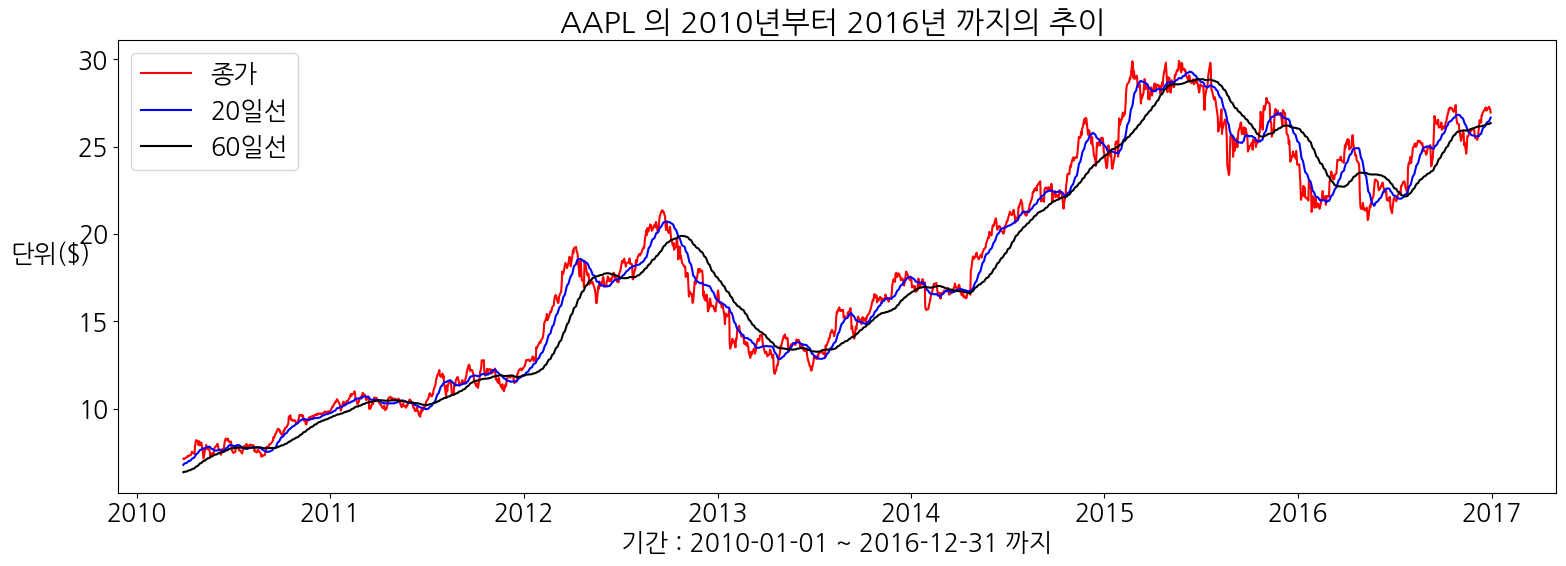

In [94]:
fig=plt.figure(figsize=(16,6))

plt.plot(AAPL_TT['AAPL 종가'], label='종가',color='r')
plt.plot(AAPL_TT['AAPL 20일선'],label='20일선',color='b')
plt.plot(AAPL_TT['AAPL 60일선'],label='60일선',color='k')
plt.title('AAPL 의 2010년부터 2016년 까지의 추이 ')
plt.xlabel('기간 : 2010-01-01 ~ 2016-12-31 까지')
plt.ylabel('단위(\$)',rotation=0,labelpad=20)

#plt.plot(AAPL_TT)
plt.tight_layout()
plt.legend()
plt.show()

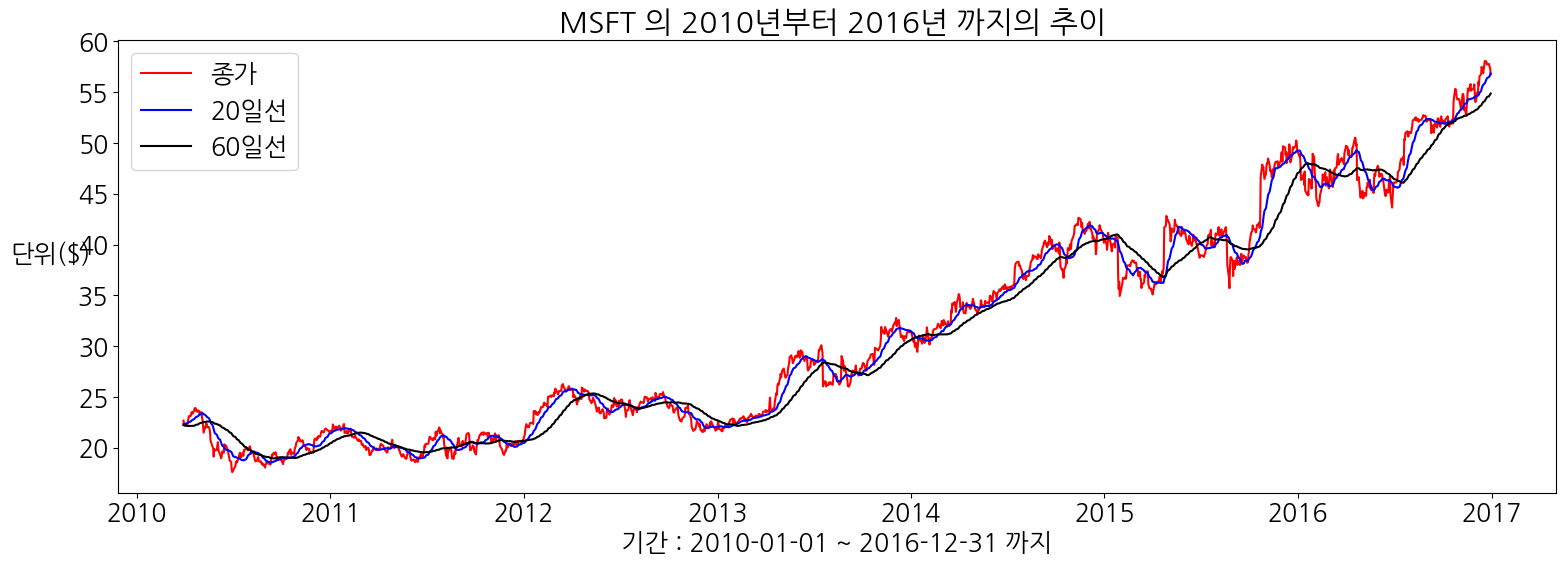

In [95]:
fig=plt.figure(figsize=(16,6))

plt.plot(MSFT_TT['MSFT 종가'], label='종가',color='r')
plt.plot(MSFT_TT['MSFT 20일선'],label='20일선',color='b')
plt.plot(MSFT_TT['MSFT 60일선'],label='60일선',color='k')
plt.title('MSFT 의 2010년부터 2016년 까지의 추이 ')
plt.xlabel('기간 : 2010-01-01 ~ 2016-12-31 까지')
plt.ylabel('단위(\$)',rotation=0,labelpad=20)

plt.tight_layout()
plt.legend()
plt.show()

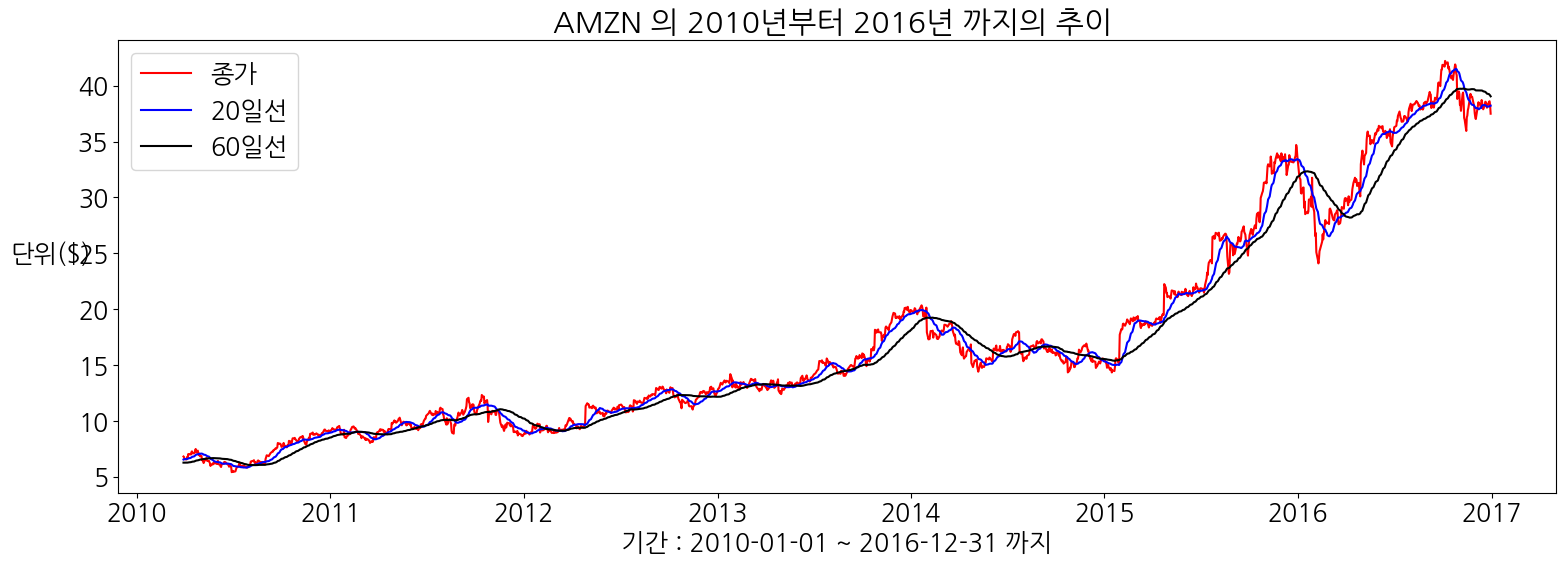

In [96]:
fig=plt.figure(figsize=(16,6))

plt.plot(AMZN_TT['AMZN 종가'], label='종가',color='r')
plt.plot(AMZN_TT['AMZN 20일선'],label='20일선',color='b')
plt.plot(AMZN_TT['AMZN 60일선'],label='60일선',color='k')
plt.title('AMZN 의 2010년부터 2016년 까지의 추이 ')
plt.xlabel('기간 : 2010-01-01 ~ 2016-12-31 까지')
plt.ylabel('단위(\$)',rotation=0,labelpad=20)

plt.tight_layout()
plt.legend()
plt.show()

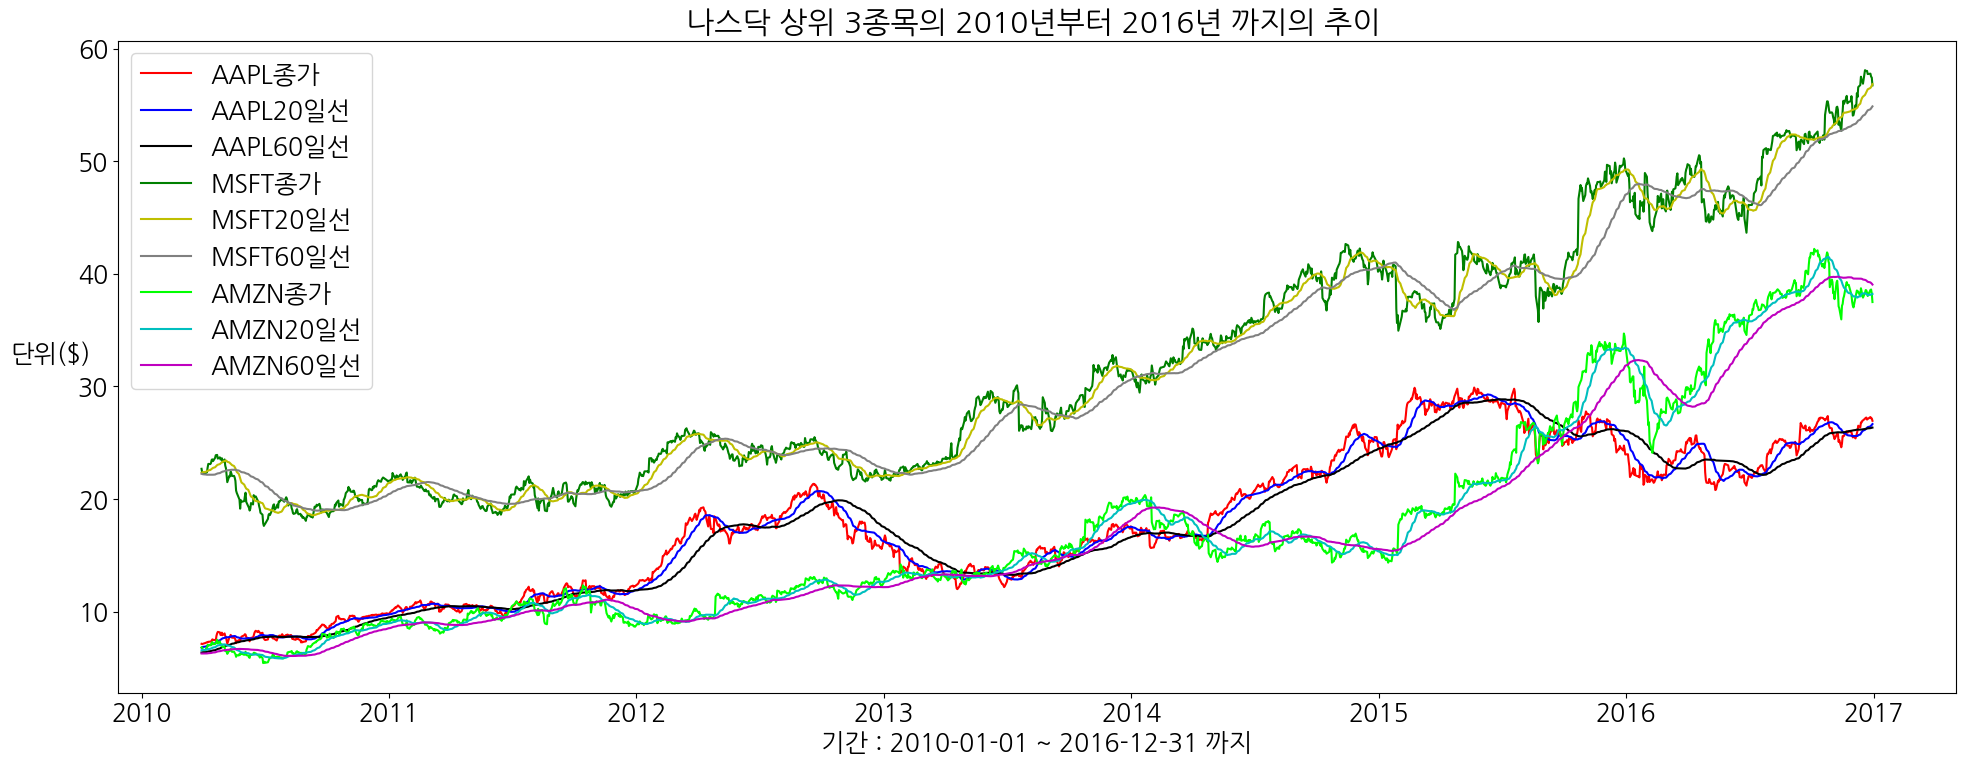

In [103]:
fig=plt.figure(figsize=(20,8))

plt.plot(AAPL_TT['AAPL 종가'], label='AAPL종가',color='r')
plt.plot(AAPL_TT['AAPL 20일선'],label='AAPL20일선',color='b')
plt.plot(AAPL_TT['AAPL 60일선'],label='AAPL60일선',color='k')

plt.plot(MSFT_TT['MSFT 종가'], label='MSFT종가',color='g')
plt.plot(MSFT_TT['MSFT 20일선'],label='MSFT20일선',color='y')
plt.plot(MSFT_TT['MSFT 60일선'],label='MSFT60일선',color='grey')

plt.plot(AMZN_TT['AMZN 종가'], label='AMZN종가',color='lime')
plt.plot(AMZN_TT['AMZN 20일선'],label='AMZN20일선',color='c')
plt.plot(AMZN_TT['AMZN 60일선'],label='AMZN60일선',color='m')
plt.title('나스닥 상위 3종목의 2010년부터 2016년 까지의 추이 ')
plt.xlabel('기간 : 2010-01-01 ~ 2016-12-31 까지')
plt.ylabel('단위(\$)',rotation=0,labelpad=20)

plt.tight_layout()
plt.legend()
plt.show()